# Final Project - Open Restaurant Program in NYC

## Members: Jieying Cai, Yuhan Mei, Sizhu Wang

---

#### Import Join dataset and revised date dataset

In [3]:
library(dplyr)
library(ggplot2)

In [4]:
rest_data <- read.csv("Join.csv")

In [5]:
head(rest_data)

,Seating.Interest..Sidewalk.Roadway.Both.,CAMIS,Approved.for.Sidewalk.Seating,Approved.for.Roadway.Seating,Time.of.Submission,X,X.1,Score,Grade,BOROUGH,Violation.Code,Violation.Description,Cuisin
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,roadway,50109522,no,yes,2021/4/22,NA,NA,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A
2,sidewalk,50113143,yes,no,2021/8/17,NA,NA,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A
3,both,50069734,yes,yes,2020/8/15,NA,NA,11,A,Queens,02G,Cold food item held above 41¬∫ F (smoked fish and reduced oxygen packaged foods above 38 ¬∫F) except during necessary preparation.,Indian
4,sidewalk,50097413,yes,no,2020/8/15,NA,NA,7,A,Brooklyn,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Hotdogs/Pretzels
5,roadway,50047872,no,yes,2020/8/14,NA,NA,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A
6,both,50104163,yes,yes,2020/8/17,NA,NA,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A


---

#### City-level responsiveness analysis

#### Using month( ) & year( ) function from lubridate package create year and month columns

In [6]:
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [7]:
rest_data$year <- year(rest_data$Time.of.Submission)

In [8]:
rest_data$month <- month(rest_data$Time.of.Submission)

In [9]:
head(rest_data,5)

,Seating.Interest..Sidewalk.Roadway.Both.,CAMIS,Approved.for.Sidewalk.Seating,Approved.for.Roadway.Seating,Time.of.Submission,X,X.1,Score,Grade,BOROUGH,Violation.Code,Violation.Description,Cuisin,year,month
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,roadway,50109522,no,yes,2021/4/22,NA,NA,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,2021,4
2,sidewalk,50113143,yes,no,2021/8/17,NA,NA,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,2021,8
3,both,50069734,yes,yes,2020/8/15,NA,NA,11,A,Queens,02G,Cold food item held above 41¬∫ F (smoked fish and reduced oxygen packaged foods above 38 ¬∫F) except during necessary preparation.,Indian,2020,8
4,sidewalk,50097413,yes,no,2020/8/15,NA,NA,7,A,Brooklyn,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Hotdogs/Pretzels,2020,8
5,roadway,50047872,no,yes,2020/8/14,NA,NA,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,2020,8


#### Filter by year

In [10]:
year_df <- rest_data %>%
    group_by(year) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(year_df)

year,counts
<dbl>,<int>
2020,11603
2021,1367


#### Filter Restaurants which applied in 2020 by month

In [11]:
yearone_df <- rest_data %>% 
    filter(year == "2020") 

In [12]:
yearone_month_df <- yearone_df %>%
    group_by(month) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

yearone_month_df

month,counts
<dbl>,<int>
6,6607
7,3004
8,1080
9,423
10,264
11,120
12,105


---

## 1. City-level health condition analysis

#### filter by grade, violation code

In [13]:
grade_df <- rest_data %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

grade_df

Grade,counts
<chr>,<int>
A,9185
#N/A,2396
B,1045
C,344


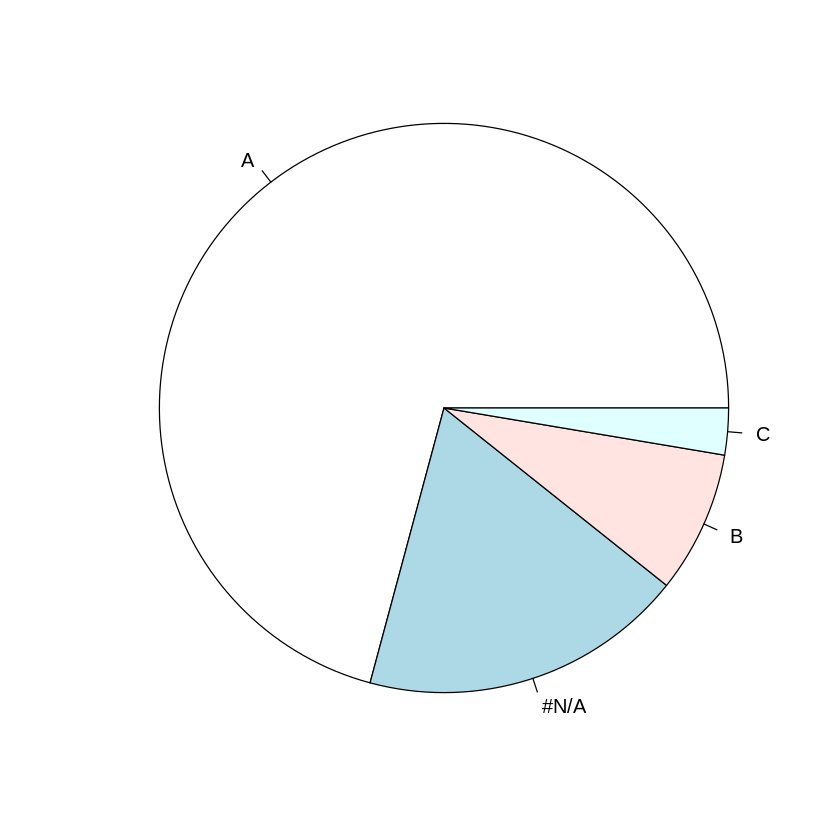

In [14]:
pie(grade_df$counts, labels = grade_df$Grade, radius = 1)

In [15]:
violation_code_df <- rest_data %>%
    group_by(Violation.Code) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

violation_code_df

Violation.Code,counts
<chr>,<int>
#N/A,2396
10F,2049
06D,996
08A,990
06C,835
10B,680
04L,572
02G,538
02B,484


---

## 2. City-level cuisine analysis

In [16]:
cuisin_df <- rest_data %>%
    group_by(Cuisin) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

cuisin_df

Cuisin,counts
<chr>,<int>
American,2535
#N/A,2396
Italian,823
Coffee/Tea,631
Mexican,560
Latin American,552
Japanese,466
Pizza,461
Chinese,368


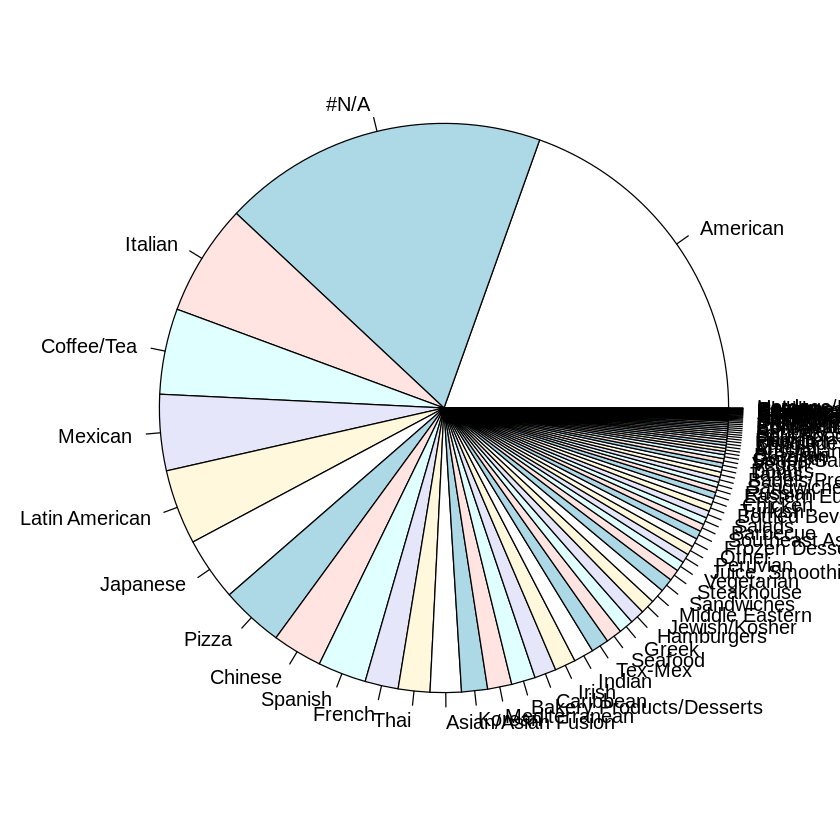

In [17]:
pie(cuisin_df$counts, labels = cuisin_df$Cuisin, radius = 1)

#### Chi-square test

In [18]:
xtab1 <- table(rest_data$Cuisin, rest_data$Grade)

xtab1

                                
                                 #N/A    A    B    C
  #N/A                           2396    0    0    0
  Afghan                            0    4    0    0
  African                           0   12    7    2
  American                          0 2268  209   58
  Asian/Asian Fusion                0  174   45   10
  Australian                        0   17    4    1
  Bagels/Pretzels                   0   33    3    1
  Bakery Products/Desserts          0  154   12   10
  Bangladeshi                       0   13    5    2
  Barbecue                          0   44    5    3
  Bottled Beverages                 0   50    1    0
  Brazilian                         0   20    3    0
  Cajun                             0    4    0    0
  Californian                       0    5    0    0
  Caribbean                         0  122   21   17
  Chicken                           0   42    3    1
  Chilean                           0    1    0    0
  Chinese    

In [19]:
test1 <- chisq.test(rest_data$Cuisin, rest_data$Grade)

test1

Warning message in chisq.test(rest_data$Cuisin, rest_data$Grade):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  rest_data$Cuisin and rest_data$Grade
X-squared = 13446, df = 243, p-value < 2.2e-16


---

## 3. Borough distribution of restaurants

In [20]:
borough_df <- rest_data %>%
    group_by(BOROUGH) %>%
    summarise(        
        counts = n()
    ) %>%
 arrange(desc(counts))

head(borough_df)

BOROUGH,counts
<chr>,<int>
Manhattan,5223
Brooklyn,2504
#N/A,2396
Queens,2104
Bronx,588
Staten Island,153


---

#### Create tables of restaurant inspection grades in different boroughs

### 3.1 Manhattan

In [21]:
Manhattan_df <- rest_data %>% 
    filter(BOROUGH == "Manhattan") 

In [22]:
Manhattan_grade_df <- Manhattan_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Manhattan_grade_df)

Grade,counts
<chr>,<int>
A,4597
B,486
C,140


### 3.2 Brooklyn

In [23]:
Brooklyn_df <- rest_data %>% 
    filter(BOROUGH == "Brooklyn")

In [24]:
Brooklyn_grade_df <- Brooklyn_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Brooklyn_grade_df)

Grade,counts
<chr>,<int>
A,2183
B,246
C,75


### 3.3 Queens

In [25]:
Queens_df <- rest_data %>% 
    filter(BOROUGH == "Queens")

In [26]:
Queens_grade_df <- Queens_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Queens_grade_df)

Grade,counts
<chr>,<int>
A,1796
B,215
C,93


### 3.4 Bronx

In [27]:
Bronx_df <- rest_data %>% 
    filter(BOROUGH == "Bronx")

In [28]:
Bronx_grade_df <- Bronx_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Bronx_grade_df)

Grade,counts
<chr>,<int>
A,471
B,86
C,31


### 3.5 Staten Island

In [29]:
Staten_Island_df <- rest_data %>% 
    filter(BOROUGH == "Staten Island")

In [30]:
Staten_Island_grade_df <- Staten_Island_df %>%
    group_by(Grade) %>%
    summarise(
        counts = n()
    ) %>%
 arrange(desc(counts))

head(Staten_Island_grade_df)

Grade,counts
<chr>,<int>
A,137
B,12
C,4


#### Chi-square test

In [31]:
xtab2 <- table(rest_data$BOROUGH, rest_data$Grade)

xtab2

               
                #N/A    A    B    C
  #N/A          2396    0    0    0
  0                0    1    0    1
  Bronx            0  471   86   31
  Brooklyn         0 2183  246   75
  Manhattan        0 4597  486  140
  Queens           0 1796  215   93
  Staten Island    0  137   12    4

In [32]:
test2 <- chisq.test(rest_data$BOROUGH, rest_data$Grade)

test2

Warning message in chisq.test(rest_data$BOROUGH, rest_data$Grade):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  rest_data$BOROUGH and rest_data$Grade
X-squared = 13040, df = 18, p-value < 2.2e-16
